# **Détermination de la capacité thermique d'un calorimètre par la méthode des mélanges et évaluation de l'incertitude-type associée**

# **Principe de la mesure**

---



L'expérience est réalisée en introduisant dans un calorimètre, isolé thermiquement du milieu extérieur, une masse d'eau $m_1$. 
Au bout de quelques minutes, la température de l'ensemble {calorimètre + eau} se stabilise à une valeur $T_1$. 

L'introduction dans le calorimètre d'une seconde masse d'eau $m_2$, de température $T_2$ différente de $T_1$, a pour but d'entraîner une variation de température du système {calorimètre + eau1 + eau2}. 

Après agitation forte, celle-ci se stabilise à une nouvelle valeur, notée $T_f$, avant d'évoluer lentement vers la température de la pièce en raison du caractère non parfaitement diathermane des parois du calorimètre sur une longue durée.

La relation permettant de calculer la capacité thermique du calorimètre est :

\begin{equation}
   C_{cal}=c_{eau}\frac{m_2(T_2-T_f)+m_1(T_1-T_f)}{T_f-T_1}
\end{equation}

Les grandeurs à mesurer pour calculer $C_{cal}* sont : $m_1$, $m_2$, $T_1$, $T_2$ et $T_f$.

# **Objectif**

---

**Le résultat d'une mesure ne peut pas être une valeur unique, mais il correspond à l'ensemble des valeurs raisonnablement attribuables à la grandeur mesurée.** 

La dispersion de cet ensemble de valeurs est évaluée grâce à l'incertitude-type.

Lorsque la mesure est répétée plusieurs fois, l'expérimentateur obtient plusieurs valeurs de $C_{cal}$.  L'incertitude-type est l'écart-type de cet ensemble de valeurs. On parle d'évaluation de type A.

Ici, l'expérience n'est pas répétée plusieurs fois. Il faut donc mettre en oeuvre une autre méthode pour évaluer l'incertitude-type (évaluation de type B). Dans ce contexte, une méthode numérique, appelée méthode de Monte-Carlo, est proposée : elle consiste à simuler numériquement la répétition de l'expérience. L'écart-type de l'ensemble des valeurs obtenues lors des ces répétitions *in silico* fournit l'incertitude-type recherchée.







# **Le code expliqué**

---


##Importation des bibliothèques
La bibliothèque `numpy` est ici utilisée pour réaliser des calculs et simuler un processus aléatoire (`random`). 
La bibliothèque `matplolib` permet de tracer des graphiques, ici un histogramme.



In [2]:
#%%# Importation des bibliothèques

import numpy as np
import matplotlib.pyplot as plt

## Sources d'incertitudes

Les **masses** ont été mesurées à l'aide d'une balance précise à 1 g près. Ainsi, si la valeur lue est de 150 g, alors on peut raisonnablement penser que la masse "réelle" est comprise entre 149,5 et 150,5 g. La demi-étendue de cet intervalle est de 0.5 g.

Les **températures** sont mesurées grâce à un thermomètre précis à 0,2 °C près.  Si la valeur lue est de 20,2°C, alors on peut raisonnablement penser que la température "réelle" est comprise entre 20,1 et 20,3 °C. La demi-étendue de cet intervalle est de 0,1 °C.

En revanche, l'évaluation de la **température "finale" $T_f$** procède d'une autre stratégie. Celle-ci est évaluée à partir du graphique de la température dans le calorimètre en fonction du temps. Ainsi, l'incertitude sur $T_f$ doit prendre en compte la "précision" du thermomètre, la "qualité" de la courbe tracée et la méthode de détermination de la température choisie par l'expérimentateur. Pour ma part, je retiens une incertitude de l'ordre de 1°C.

Enfin, les masses $m_1$ et $m_2$ sont déterminées d'abord par pesée d'un bécher rempli, puis par pesée de ce même bécher vidé. L'obtention des masses $m_1$ et $m_2$ s'accompagne donc de deux sources d'incertitudes.

\begin{equation}
   m=m_f-m_i
\end{equation}

Les grandeurs réellement mesurées sont donc : $m_{1i}$, $m_{1f}$, $m_{2i}$, $m_{2f}$, $T_1$, $T_2$ et $T_f$.



In [39]:
#%%# Paramètres ajustables du script

#Valeurs expérimentales mesurées (températures en °C et masses en g)
t1 = 20.2   # Température eau1 froide + calorimètre avant introduction eau2
t2 = 47.3   # Température eau2 chaude avant introduction dans le calorimètre
tf = 31.2   # Teméprature finale du mélange dans l'hypothèse adiabatique
m1i = 153   # Masse du bécher1 + eau1 froide 
m1f = 99    # Masse du bécher1 vidé
m2i = 176   # Masse du bécher2 + eau2 chaude 
m2f = 119   # Masse du bécher2 vidé

#Saisie de données relatives à la précision des mesures
at = .1     # Demi-étendue sur l'intervalle des températures T1 et T2
atf = 1     # Demi-étendue sur l'intervalle de la température Tf
am = .5     # Demi-étendue sur l'intervalle des masses


## Principe de la méthode Monte-Carlo

La méthode Monte-Carlo consiste à simuler numériquement, un très grand nombre de fois, l'expérience qui a été réalisée durant le TP. 
Pour chaque expérience simulée, des valeurs des grandeurs $m_{1i}$, $m_{1f}$, $m_{2i}$, $m_{2f}$, $T_1$, $T_2$ et $T_f$ sont tirées au sort dans un intervalle centré sur la valeur obtenue lors de la mesure.

Pour le thermomètre ou la balance, si l'on suppose qu'aucune des valeurs dans l'intervalle n'est plus probable qu'une autre, alors, on utilise la commande `np.random.uniform` pour le tirage au sort :
```
np.random.uniform(x-a,x+a)
#x représente la valeur expérimentale obtenue
#a représente la demi-étendue
```

Si la valeur centrale de l'intervalle est plus probable que les valeurs aux extrémités de l'intervalle, on peut utiliser la commande `np.random.triangular` pour le tirage au sort  :
```
np.random.triangular(x-a,x,x+a)
#x représente la valeur expérimentale obtenue
#a représente la demi-étendue
```

Chaque expérience simulée fournit ainsi un jeu de 7 valeurs expérimentales tirées au sort, à partir desquelles il est possible de calculer une valeur de la capacité thermique du calorimètre. Cette valeur calculée est stockée dans une liste.


In [37]:
#%%# Simulation de N expériences 

#Saisie du nombre d'expériences numériques à simuler
N=30000

# Tirage de valeurs des grandeurs mesurées et calcul de Ccal 

Ccal = [] 

for k in range(N) :
    T1=np.random.uniform(t1-at,t1+at)
    T2=np.random.uniform(t2-at,t2+at)
    Tf=np.random.triangular(tf-atf,tf,tf+atf)
    M1i=np.random.uniform(m1i-am,m1i+am)
    M1f=np.random.uniform(m1f-am,m1f+am)
    M2i=np.random.uniform(m2i-am,m2i+am)
    M2f=np.random.uniform(m2f-am,m2f+am)
    Ccal.append(4.18*((M2i-M2f)*(T2-Tf)/(Tf-T1)+(M1f-M1i)))

## Affichage des résultats
A l'issue des N simulations, la liste `Ccal` contient donc N valeurs de capacités thermiques. Cette liste est utilisée pour déterminer : 
*   La valeur moyenne des valeurs simulées, meilleur estimateur de la capacité thermique $C_{cal}$,
*   L'écart-type de la distribution, qui constitue l'incertitude-type $u_{C_{cal}}$ sur la capacité thermique.





In [45]:
#%%# Affichage des résultats
    
# Calcul de la valeur moyenne de Ccal et de l'écart-type
Ccalm = sum(Ccal)/N         #Moyenne arithmétique des valeurs calculées de Ccal
uCcal = np.std(Ccal,ddof=1) #Ecart-type des valeurs calculées de Ccal

#Affichage des résultats
print(f'Meilleur estimateur : {Ccalm} J/K')
print(f'Incertitude-type : {uCcal} J/K')

Meilleur estimateur : 123.84737914106668 J/K
Incertitude-type : 22.177019672702656 J/K


Le résultat de la mesure pourra être donné ainsi :
\begin{equation}
   C_{cal}=124 J.K^{-1} 
\end{equation}
\begin{equation}
   u_{C_{cal}}=22 J.K^{-1}
\end{equation}


# **En résumé : les 4 étapes du code**


---


Le code est organisé en 4 étapes :
1. Définir le nombre de tirages à simuler.
2. Réaliser le tirage de valeurs "expérimentales" :
3. Calculer, avec chaque jeu de valeurs simulées, la grandeur à déterminer et stocker cette valeur dans une liste.
4. Calculer la moyenne et l'écart-type des valeurs de la liste.





In [46]:
import numpy as np
import matplotlib.pyplot as plt

N=100000

Ccal = [] 

for k in range(N) :
    T1=np.random.uniform(20.1,20.3)
    T2=np.random.uniform(47.2,47.4)
    Tf=np.random.triangular(30.2,31.2,32.2)
    M1i=np.random.uniform(152.5,153.5)
    M1f=np.random.uniform(98.5,99.5)
    M2i=np.random.uniform(175.5,176.5)
    M2f=np.random.uniform(118.5,119.5)
    Ccal.append(4.18*((M2i-M2f)*(T2-Tf)/(Tf-T1)+(M1f-M1i)))

Ccalm = sum(Ccal)/N         
uCcal = np.std(Ccal,ddof=1) 

print(f'Capacité thermique : {Ccalm} J/K')
print(f'Incertitude-type u(Ccal) : {uCcal} J/K')

Capacité thermique : 123.95503150275724 J/K
Incertitude-type u(Ccal) : 22.241021483680992 J/K


# **Pour aller plus loin : Génération d'un histogramme**

---


Les N valeurs calculées de $C_{cal}$ sont rangées par classes de manière à construire un histogramme et ainsi juger plus facilement de la dispersion des résultats.
Pour faciliter l'analyse du graphique, une gaussienne :
 
*   centrée sur la valeur moyenne des capacités thermiques du calorimètre
*   d'écart-type égal à l'incertitude-type calculée

est superposée à l'histogramme.


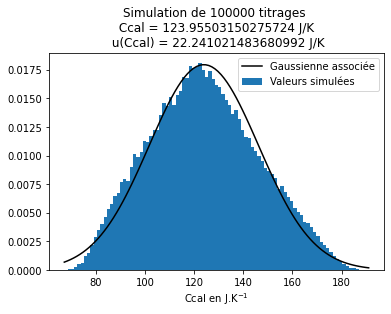

In [47]:
#%%# Génération d'histogrammes 

x = np.linspace(np.min(Ccal),np.max(Ccal),100)
Gaussienne = [1/(sqrt(2*np.pi*uCcal**2))*exp(-1/2*((z-Ccalm)/uCcal)**2) for z in x]

plt.hist(Ccal, bins='rice', density = True, label = "Valeurs simulées")
plt.plot(x, Gaussienne, 'k-', label = "Gaussienne associée")
plt.title(f'Simulation de {N} titrages \n Ccal = {Ccalm} J/K \n u(Ccal) = {uCcal} J/K')
plt.xlabel('Ccal en J.K$^{-1}$')
plt.legend()
plt.show()